using python and numpy write function to sample from a continuous empirical distribution. 

function arguments

1. a sorted list of lower bounds of a discrete empirical distribution
2. a sorted list of the upper bounds of a discrete empirical distribution
3. a sorted list of cumulative probabilities of a discrete empirical distribution

The function

1. creates a numpy random Generator object 
2. samples a value U from the uniform(0, 1) distribution
2. uses U to obtain lower and upper bounds of a sample from the discrete empirical distribution 
3. uses linear interpolatation of U between the lower and upper bound in order to obtain a continuous value.  

return the continuous value.

do not use scipy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def sample_from_empirical_distribution(lower_bounds, upper_bounds, cumulative_probs):
    # Create a numpy random Generator object
    rg = np.random.default_rng()
    
    # Sample a value U from the uniform(0, 1) distribution
    U = rg.random()
    
    # Obtain lower and upper bounds of a sample from the discrete empirical distribution
    idx = np.searchsorted(cumulative_probs, U)
    lb, ub = lower_bounds[idx], upper_bounds[idx]
    
    # Use linear interpolation of U between the lower and upper bound to obtain a continuous value
    continuous_value = lb + (ub - lb) * (U - cumulative_probs[idx-1]) / (cumulative_probs[idx] - cumulative_probs[idx-1])
    
    return continuous_value


In [3]:
class ContinuousEmpiricalDistribution:
    
    def __init__(self, lower_bounds, upper_bounds, freq, random_seed=None):
        self.lower_bounds = np.asarray(lower_bounds)
        self.upper_bounds = np.asarray(upper_bounds)
        self.cumulative_probs = self.create_cumulative_probs(freq)
        self.rng = np.random.default_rng(random_seed)

    def create_cumulative_probs(self, freq):
        freq = np.asarray(freq)
        return np.cumsum(freq / freq.sum())

    def sample(self, size=None):

        if size is None:
            size = 1

        samples = []
        for i in range(size):
        
            # Sample a value U from the uniform(0, 1) distribution
            U = self.rng.random()
            
            # Obtain lower and upper bounds of a sample from the discrete empirical distribution
            idx = np.searchsorted(self.cumulative_probs, U)
            lb, ub = self.lower_bounds[idx], self.upper_bounds[idx]
            
            # Use linear interpolation of U between the lower and upper bound to obtain a continuous value
            continuous_value = lb + (ub - lb) * (U - self.cumulative_probs[idx-1]) / (self.cumulative_probs[idx] - self.cumulative_probs[idx-1])

            samples.append(continuous_value)

        if size == 1:
            return samples[0]
        else:
            return np.asarray(samples)


In [4]:
dist = ContinuousEmpiricalDistribution(lower_bounds, upper_bounds, freq)
dist.sample(size=None)

NameError: name 'lower_bounds' is not defined

In [ ]:
freq = [34, 4, 8, 13, 15, 13, 19, 13, 9,  12, 73]

lower_bounds = [0, 5, 10, 15, 30, 45, 60, 120, 180, 240, 480]

upper_bounds = [5, 10, 15, 30, 45, 60, 120, 180, 240, 480, 2880]


# cumulative probs
probs = [0.15962441314554,
        0.178403755868545,
        0.215962441314554,
        0.276995305164319,
        0.347417840375587,
        0.408450704225352,
        0.497652582159624,
        0.55868544600939,
        0.60093896713615,
        0.657276995305164,
        1.0]

In [ ]:
n = 10_000
results = [sample_from_empirical_distribution(lower_bounds, upper_bounds, probs) for _ in range(n)]

In [5]:
def distribution_plot(samples, bins):
    '''
    helper function to visualise the distributions
    '''
    hist = np.histogram(samples, bins=np.arange(bins), 
                        density=True)
    plt.hist(samples, density=True);
    plt.ylabel('p(x)');
    plt.xlabel('x');

In [6]:
frq, edges = np.histogram(results, bins=upper_bounds)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

NameError: name 'results' is not defined

In [ ]:


fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

In [ ]:
## Erlang distribution

In [7]:
class Erlang:
    '''
    Sum of k erlang distributions
    '''
    def __init__(self, mean, stdev, location=0.0, random_seed=None):
        self.mean = mean
        self.stdev = stdev
        self.location = location
        self.rng = np.random.default_rng(random_seed)

        # k also referred to as shape
        self.k = round((mean / stdev) ** 2)

        # theta also referred to as scale
        self.theta = mean / self.k

    def sample(self, size=None):
        return self.rng.gamma(self.k, self.theta, size) + self.location

In [ ]:
import numpy as np

def sample_from_gamma(alpha, beta, size):
    shape = alpha
    scale = 1/beta
    return np.random.gamma(shape, scale, size)


In [ ]:
class Gamma:
    '''
    Gamma distribution

    Gamma distribution set up to accept alpha (scale) and beta (shape)
    parameters as described in Law (2007).  

    Also contains functions to compute mean, variance, and a static method
    to computer alpha and beta from specified mean and variance.
    
    '''
    def __init__(self, alpha, beta, location=0.0, random_seed=None):
        '''
        Gamma distribution
        
        Params:
        ------
        alpha: float
            shape parameters

        beta: float
            scale parameter

        location, float, optional (default=0.0)
            Offset the original of the distribution i.e.
            the returned value = sample[Gamma] + location

        random_seed: int, optional (default=None)
            A random seed to reproduce samples. If set to none then a unique
            sample is created.
                    
        '''

        if alpha <= 0 or beta <= 0:
            raise ValueError("alpha and beta must be > 0")
        
        self.alpha = alpha  # shape
        self.beta =  beta # scale
        self.location = location
        self.rng = np.random.default_rng(random_seed)

    def mean(self):
        '''
        The computed mean of the gamma distribution

        Returns:
        -------
        float
        '''
        return self.alpha * self.beta

    def variance(self):
        '''
        The computed varaince of the gamma distribution

        Returns:
        -------
        float
        '''
        return self.alpha * (self.beta ** 2)

    @staticmethod
    def params_from_mean_and_var(mean, var):
        '''
        Helper static method to get alpha and beta parameters
        from a mean and variance.

        Params:
        ------
        mean: float
            mean of the gamma distribution

        var: float
            variance of the gamma distribution

        Returns:
        -------
        (float, float)
        alpha, beta
        
        '''
        alpha = mean **2 / var
        beta = mean / var
        return alpha, beta
        
    def sample(self, size=None):
        return self.rng.gamma(self.alpha, self.beta, size) + self.location

        

In [ ]:
alpha = 2.84
beta = 7.42

N = 1_000_000
g_dist = Gamma(alpha, beta, location=0.0)
samples = g_dist.sample(N)

frq, edges = np.histogram(samples)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()


print(g_dist.mean())
print(samples.mean())
print(g_dist.variance())
print(samples.var())

In [ ]:
from scipy.stats import weibull_min
from scipy.integrate import quad

class Weibull:
    '''
    Weibull distribution

    The Weibull takes shape (alpha) and scale (beta) parameters.  Both shape and scale
    should be > 0. The higher the scale parameters the more variance in the samples.

    This implementation also includes a third parameter "location"
    (default = 0) to shift the distribution if a lower bound is needed.
    '''
    def __init__(self, alpha, beta, location=0.0, random_seed=None):
        '''
        Three parameter Weibull distribution.

        Params:
        ------
        alpha: float
            The shape parameter.
            
        beta: float:
            The scale parameter.  The higher the scale parameters the 
            more variance in the samples

        location: float, optional (default=None)
            An offset from 0.0

        Notes:
        ------
        Check that the mean and variance of the samples are as expected.
        
        This is because it is easy to make mistakes when setting the shape 
        and scale parameters if converting from other notation. 
        For example:
        
        In Law and Kelton, shape=alpha and scale=beta. But ->

        Wikipedia defines shape=k and scale = lambda = 1/beta
        https://en.wikipedia.org/wiki/Weibull_distribution

        other sources define shape=beta and scale=eta (η)  

        In random.weibullvariate alpha=scale and beta=shape!
        '''

        if alpha <= 0 or beta <= 0:
            raise ValueError("alpha and beta must be > 0")
                             
        self.shape = alpha
        self.scale = beta
        self.rng = np.random.default_rng(random_seed)

    def sample(self, size=None):
        return self.scale * self.rng.weibull(self.shape, size)

In [ ]:


# Python code to demonstrate math.factorial()
import math

alpha = 1.93
beta = 19.15

N = 1_000_000
w_dist = Weibull(alpha, beta)
samples = w_dist.sample(N)

frq, edges = np.histogram(samples)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

print(samples.mean())
print(g_dist.mean())


from random import weibullvariate

samples2 = [weibullvariate(beta, alpha) for _ in range(N)]

frq, edges = np.histogram(samples2)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")


plt.show()            

print(sum(samples2)/N)

In [ ]:
class Beta:
    '''
    Beta distribution 

    As defined in  Simulation Modeling and Analysis (Law, 2007).

    Accepts to shape parameters alpha1 and alpha2.  
    The beta distribution is [0, 1]. 
    This can be rescaled using to [min, max] using
    min + (max - min) * sample(Beta)  

    Common uses:
    -----------
    1. Useful as a rough model in the absence data
    2. Distribution of a random proportion
    3. Time to complete a task.
    '''
    def __init__(self, alpha1, alpha2, min=0.0, max=1.0, random_seed=None):
        '''
        Beta distribution

        Params:
        -------
        alpha1: float
            shape parameter 1

        alpha2: float
            shape parameter 2

        min: float, optional (default=0.0)
            Used with max to rescale [0,1] to [min, max]

        max: float, optional (default=1.0)
            Used with max to rescale [0,1] to [min, max]

        random_seed: int, optional (default=None)
            A random seed to reproduce samples. If set to none then a unique
            sample is created.
        '''
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.min = min
        self.max = max
        self.rng = np.random.default_rng(random_seed)

    def sample(self, size=None):
        return (self.min + (self.max - self.min)) * np.random.beta(self.alpha1, self.alpha2, size)

In [ ]:
alpha1 = 1.32
alpha2 = 2.56

N = 1_000_000
b_dist = Beta(alpha1, alpha2)
samples = b_dist.sample(N)

frq, edges = np.histogram(samples)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

print(samples.mean())

In [ ]:
def sample_weibull(rg, shape, scale, size=None):
    return rg.weibull(shape, size=size) * scale

In [ ]:
samples = sample_weibull(np.random.default_rng(), beta, alpha, size=N)

frq, edges = np.histogram(samples)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

print(samples.mean())

In [ ]:
Gamma.params_from_mean_and_var(0.383, 0.052)

In [ ]:
g_dist.mean() / g_dist.variance()

In [ ]:
g_dist.mean() ** 2 / g_dist.variance()

In [ ]:
Mean (32.29), Standard deviation (9.26), Location (2.83)

In [ ]:
mean = 32.9
stdev = 9.26
location = 2.83

N = 100_000
dist = Erlang(mean, stdev, location)
samples = dist.sample(N)

In [ ]:
frq, edges = np.histogram(samples)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

In [ ]:
(samples - location).mean()

In [ ]:
class Discrete:
    '''
    Discrete distribution

    Sample a value with a given observed frequency.

    Example uses:
    -------------
    1. routing percentages
    2. classes of entity
    3. batch sizes of arrivals
    
    '''
    def __init__(self, values, freq, random_seed=None):
        '''
        Discrete distribution

        Params:
        ------
        values: array-like
            list of sample values. Must be of equal length to freq

        freq: array-like
            list of observed frequencies. Must be of equal length to values

        random_seed, int, optional (default=None)
            A random seed to reproduce samples. If set to none then a unique
            sample is created.            
        '''
        if (len(values) != len(freq)):
            raise ValueError('values and freq arguments must be of equal length')
            
        self.values = np.asarray(values)
        self.freq = np.asarray(freq)
        self.probabilities = self.freq / self.freq.sum()
        self.rng = np.random.default_rng(random_seed)        

    def sample(self, size=None):
        return self.rng.choice(self.values, p=self.probabilities, size=size)


In [ ]:
values = [1, 2, 3]
freq = [95, 3, 2]

edf = Discrete(values, freq)

samples = edf.sample(N)

frq, edges = np.histogram(samples, bins=3)
print(frq, edges)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()


In [ ]:
from numpy.random import random_sample
import itertools

def weighted_values(elements, cum_probs, size=None):
    return elements[np.digitize(random_sample(size), cum_probs)]


class discrete_dist(object):
    """
    Encapsulates a discrete distribution
    """
    def __init__(self, elements, probabilities):
        self.elements = elements
        self.probabilities = probabilities
        
        self.validate_lengths(elements, probabilities)
        self.validate_probs(probabilities)
        
        self.cum_probs = np.add.accumulate(probabilities)
        print(self.cum_probs)
        
    def validate_lengths(self, elements, probs):
        if (len(elements) != len(probs)):
            raise ValueError('Elements and probilities arguments must be of the same length')
            
    def validate_probs(self, probs):
        if(sum(probs) != 1):
            raise ValueError('Probabilities must sum to 1')
        
    def sample(self, size=None):
        return np.random.choice(self.elements, p=self.probabilities, size=size)

In [ ]:
probs = [0.95, 0.03, 0.02]
values = [1, 2, 3]
cum_probs = [0.95, 0.98, 1.0]



old = discrete_dist(values, probs)

samples = old.sample(N)

frq, edges = np.histogram(samples, bins=3)
print(frq, edges)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

In [19]:
class TruncatedDistribution:
    '''
    Truncated Distribution

    Pass in any distribution class and this class
    will tuncate the distribution at a lower bound.

    No resampling is done the class simply returns
    the maximum value.
    '''
    
    def __init__(self, dist_to_truncate, lower_bound):
        self.dist = dist_to_truncate
        self.lower_bound = lower_bound

    def sample(self, size=None):
        if size is not None:
            samples =  self.dist.sample(size)
            samples[samples < self.lower_bound] = self.lower_bound
            return samples

        else:
            sample = self.dist.sample()
            return max(self.lower_bound, sample)
        
        

[98253  1713    34] [40.         57.87223675 75.7444735  93.61671025]


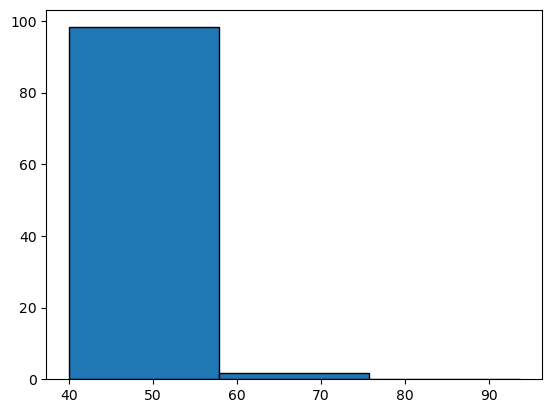

40.0

In [17]:
mean = 32.9
stdev = 9.26
location = 2.83

N = 100_000
dist = Erlang(mean, stdev, location)

trunc_dist = TruncatedDistribution(dist, lower_bound=40.0)
samples = trunc_dist.sample(N)

frq, edges = np.histogram(samples, bins=3)
print(frq, edges)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / N) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()


trunc_dist.sample()

In [18]:
test = np.array([1, 2, 3, 4, 5])
lower_bound = 2

print(test)
test[test < lower_bound] = lower_bound
print(test)

[1 2 3 4 5]
[2 2 3 4 5]


In [28]:
class RawEmpirical:
    '''
    Sample with replacement from a list of raw empirical values

    Useful if none of the theoretical distributions on offer fit the data

    Notes:
    -----
    If sample size is small consider if upper and lower limits in raw data
    are representative of the real world system.  
    '''
    def __init__(self, values, random_seed=None):
        self.values = values
        self.rng = np.random.default_rng(random_seed)

    def sample(self, size=None):
        return self.rng.choice(self.values, size)

In [30]:
raw = np.array([0.55534686, 0.84594113, 0.28451875, 0.2529138 , 0.52460079,
       0.84680471, 0.9899192 , 0.04176276, 0.99506401, 0.24738296,
       0.79799653, 0.71077698, 0.88373967, 0.36982069, 0.83926874,
       0.90613567, 0.93790284, 0.76434629, 0.57030579, 0.9000658 ])

dist = RawEmpirical(raw, random_seed=42)
print(dist.sample(size=5))
print(dist.sample())

[0.84594113 0.90613567 0.36982069 0.99506401 0.99506401]
0.76434629


In [101]:
class PearsonV:
    """
    The PearsonV(alpha, beta) is an inverse gamma distribution.

    Where alpha = shape, and beta = scale (> 0)

    Law (2007, pg 293-294) defines PearsonV(alpha, beta) = 1/Gamma(alpha, 1/beta) and note
    PDF similar to that of lognormal, but have larger spike close to 0.

    Alternative Sources:
    --------------------
    [1] https://riskwiki.vosesoftware.com/PearsonType5distribution.php
    [2] https://modelassist.epixanalytics.com/display/EA/Pearson+Type+5

    sources last access 03/01/2024

    Notes:
    ------
    A good R package for Pearson distributions is PearsonDS
    https://www.rdocumentation.org/packages/PearsonDS/versions/1.3.0
        
    """
    def __init__(self, alpha, beta, random_seed=None):
        '''
        PearsonV

        Params:
        ------
        alpha: float
            Shape parameter. Must be > 0

        beta: float
            Scale parameter. Must be < 0

        random_seed, int, optional (default=None)

        '''
        if alpha <= 0 or beta <= 0:
            raise ValueError("alpha and beta must be > 0")
        self.alpha = alpha
        self.beta = beta
        self.rng = np.random.default_rng(random_seed)

    def mean(self) -> float:
        if self.alpha > 1.0:
            return self.beta / (self.alpha - 1)
        else:
            msg = "Cannot directly compute mean when alpha < 1.0"
            raise ValueError(msg)

    def var(self) -> float: 
        if self.alpha > 2.0:
            return (self.beta **2) / (((self.alpha - 1) ** 2) * (self.alpha - 2))
        else:
           msg = "Cannot directly compute var when alpha < 2.0"
           raise ValueError(msg) 
    
    def sample(self, size=None):
        return 1 / self.rng.gamma(self.alpha, 1 / self.beta, size)

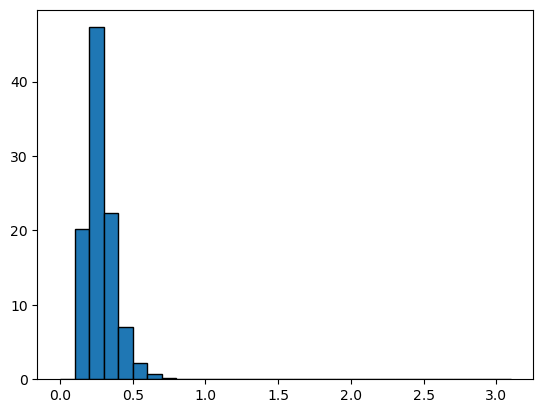

0.06537684646014814
3.4581522690735746
0.27778051849206437
0.00965047147781315
0.22727272727272727
0.009645061728395061
0.2777777777777778 0.009645061728395061


In [102]:
alpha = 10.0
beta = 2.5
N = 10_000_000

pv = PearsonV(alpha, beta)

samples = pv.sample(N)

frq, edges = np.histogram(samples, bins=np.linspace(0.0, 3.1, 32))
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / N) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()
print(min(samples))
print(max(samples))
print(samples.mean())
print(samples.var())

computed_mean = beta / (alpha + 1)
print(computed_mean)

computed_variance = (beta **2) / (((alpha - 1) ** 2) * (alpha - 2))
print(computed_variance)

print(pv.mean(), pv.var())

In [93]:
edges

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1])

In [115]:
class PearsonVI:
    """
    Pearson6(a1,a2,b)=b∗X/(1−X), where X=Beta(a1,a2,1)
    """
    def __init__(self, alpha1, alpha2, beta, random_seed=None):
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.beta = beta
        self.rng = np.random.default_rng(random_seed)

    def mean(self):
        if self.alpha2 > 1.0:
            return (self.beta * self.alpha1) / (self.alpha2 - 1)
        else:
            raise ValueError("Cannot compute mean when alpha2 <= 1.0")

    def var(self):
        if self.alpha2 > 2.0:
            return ((self.beta ** 2) * self.alpha1 * (self.alpha1 + self.alpha2 - 1)) / (((self.alpha2 - 1) ** 2) * (self.alpha2 - 2))
    
    def sample(self, size=None):
        #Pearson6(a1,a2,b)=b∗X/(1−X), where X=Beta(a1,a2,1)
        X = self.rng.beta(alpha1, alpha2, size)

        return self.beta * X / (1 - X)
        

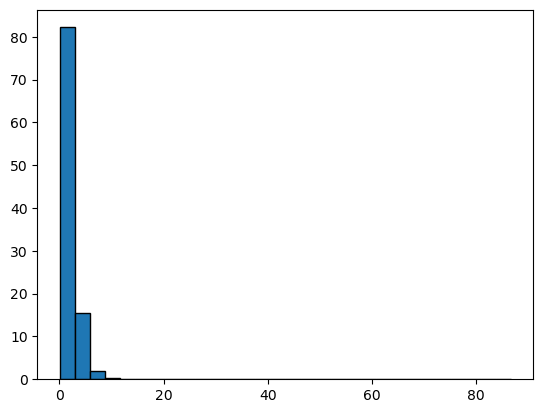

0.11794738762442078
86.6806162878812
2.1251723412107957
2.1066369579899558
2.125
2.1072916666666663


In [123]:
alpha1 = 10.0
alpha2 = 5.0
beta = 0.85
N = 10_000_000

p6 = PearsonVI(alpha1, alpha2, beta)

samples = p6.sample(N)

frq, edges = np.histogram(samples, bins=30)#, bins=np.linspace(0.0, 3.1, 32))
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / N) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()
print(min(samples))
print(max(samples))
print(samples.mean())
print(samples.var())
print(p6.mean())
print(p6.var())

In [110]:
# mean 
(beta * alpha1) / (alpha2 - 1)

2.125

In [114]:
# var
((beta ** 2) * alpha1 * (alpha1 + alpha2 - 1)) / (((alpha2 - 1) ** 2) * (alpha2 - 2))

2.1072916666666663

In [128]:
from typing import Optional

class ErlangK:
    """
    Erlang distribution where k and theta are specified.

    The Erlang is a special case of the gamma distribution where
    k is a positive integer.  Internally this is implemented using
    numpy Generators gamma method. 

    Optionally a user can offet the original of the distribution
    using the location parameter.
    """

    def __init__(
        self,
        k: int,
        theta: float,
        location: Optional[float] = 0.0,
        random_seed: Optional[int] = None,
    ):
        """
        Constructor method

        Params:
        -------
        k: integer
            Mean of the Erlang

        stdev: float
            Standard deviation of the Erlang distribution

        location: float, optional (default=0.0)
            Offset the original of the distribution i.e.
            the returned value = sample[Erlang] + location

        random_seed, int, optional (default=None)
            A random seed to reproduce samples. If set to none then a unique
            sample is created.
        """
        if k < 0.0:
            raise ValueError("k must be > 0")
        
        self.k = k
        self.theta = theta
        self.location = location
        self.rng = np.random.default_rng(random_seed)

    def sample(self, size=None):
        """
        Sample fron the Erlang distribution

        Params:
        -------
        size: int, optional (default=None)
            Number of samples to return. If integer then
            numpy array returned.
        """
        return self.rng.gamma(self.k, self.theta, size) + self.location

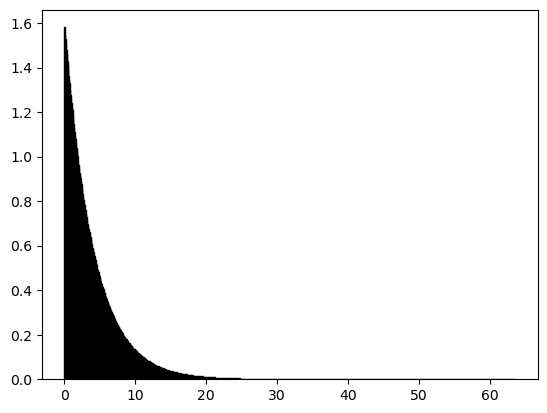

1.6133614894140933e-06
63.60694357094066
4.001079249303962
16.018516455389122
2.125
2.1072916666666663


In [132]:
k = 1
theta = 4.0
N = 10_000_000

dist = ErlangK(k, theta)
    
samples = dist.sample(N)

frq, edges = np.histogram(samples, bins=1000)#, bins=np.linspace(0.0, 3.1, 32))
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / N) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()
print(min(samples))
print(max(samples))
print(samples.mean())
print(samples.var())

In [133]:
class Poisson:
    def __init__(self, rate, random_seed=None):
        self.rate = rate
        self.rng = np.random.default_rng(random_seed)

    def sample(self, size=None):
        return self.rng.poisson(self.rate, size)
        

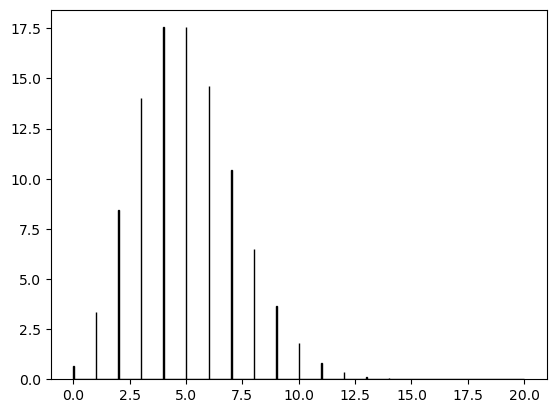

0
20
4.9991119
4.9978235112783915


In [134]:
dist = Poisson(5.0)
samples = dist.sample(N)

frq, edges = np.histogram(samples, bins=1000)#, bins=np.linspace(0.0, 3.1, 32))
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / N) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()
print(min(samples))
print(max(samples))
print(samples.mean())
print(samples.var())